<a href="https://colab.research.google.com/github/anmol1140w/multiple_linear_regression/blob/main/Marketing_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Marketing_prediction

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Marketing_Data.csv')
df.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


In [3]:
df

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88
...,...,...,...,...
166,45.84,4.44,16.56,9.12
167,113.04,5.88,9.72,11.64
168,212.40,11.16,7.68,15.36
169,340.32,50.40,79.44,30.60


In [4]:
df.isnull().sum()

,0
youtube,0
facebook,0
newspaper,0
sales,0


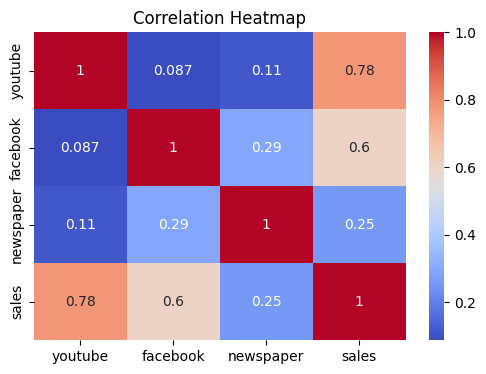

In [5]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

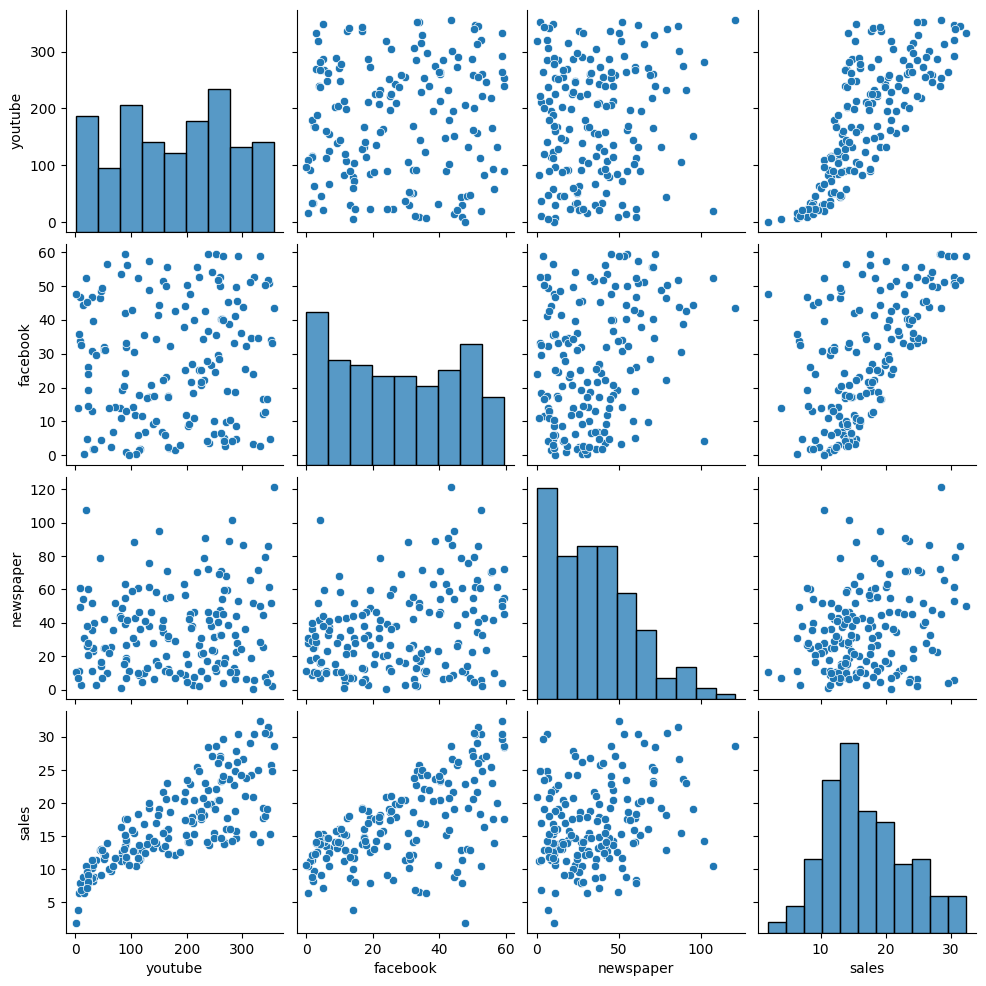

In [6]:
# Pairplot
sns.pairplot(df)
plt.show()



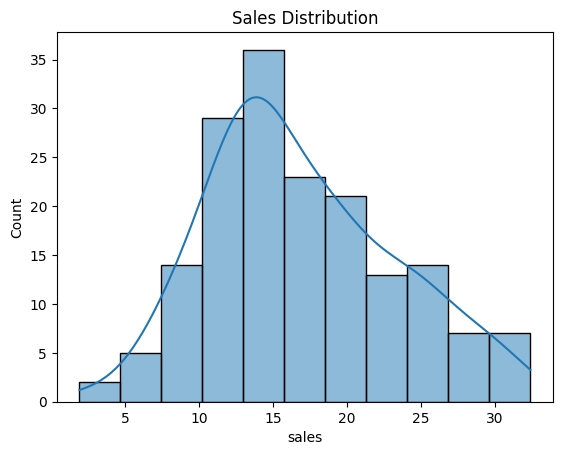

In [7]:
# Distribution of sales
sns.histplot(df['sales'], kde=True)
plt.title('Sales Distribution')
plt.show()


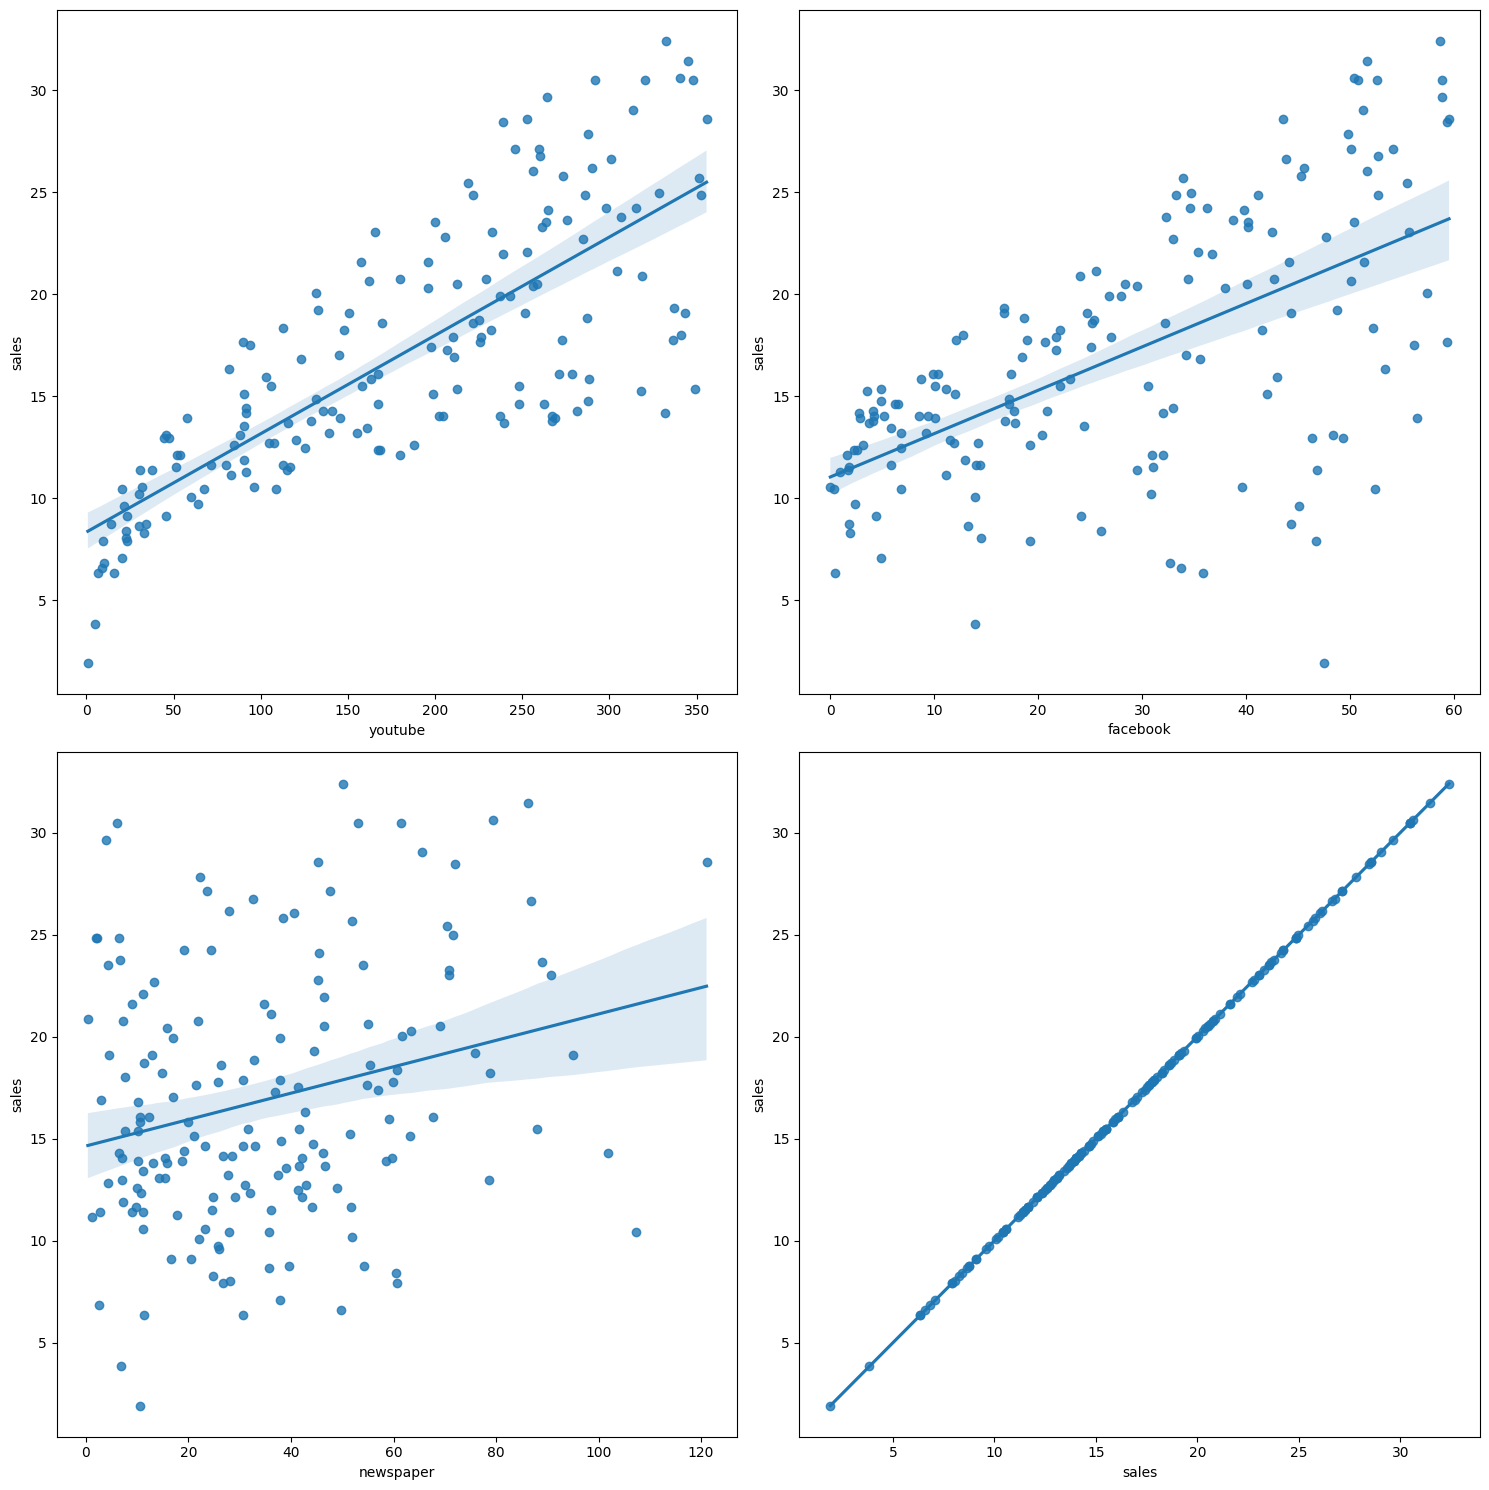

In [8]:
plt.figure(figsize=(15,15))
for i, feature in enumerate(df):
    plt.subplot(2,2,i+1)
    sns.regplot(x=feature,y="sales",data=df)
plt.tight_layout()
plt.show()

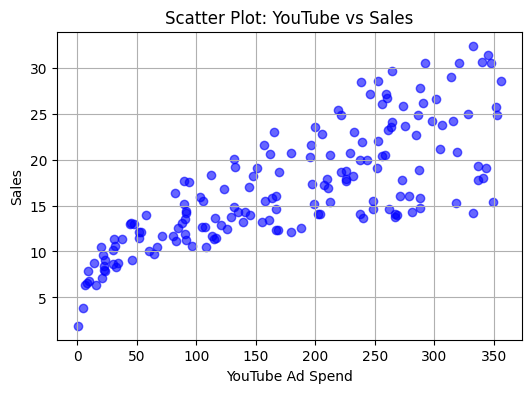

In [9]:
plt.figure(figsize=(6, 4))
plt.scatter(df['youtube'], df['sales'], color='blue', alpha=0.6)
plt.title('Scatter Plot: YouTube vs Sales')
plt.xlabel('YouTube Ad Spend')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


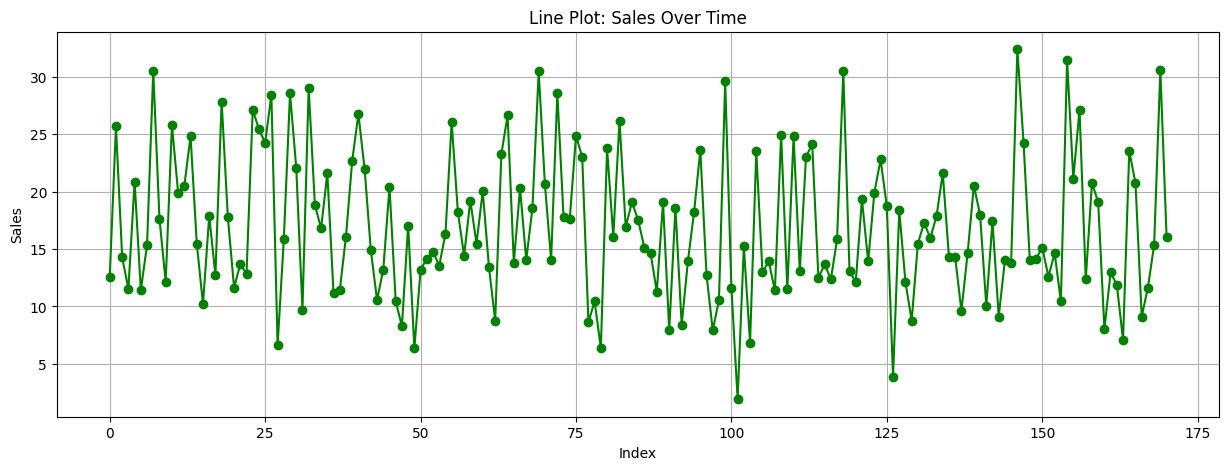

In [10]:
plt.figure(figsize=(15, 5))
plt.plot(df.index, df['sales'], marker='o', linestyle='-', color='green')
plt.title('Line Plot: Sales Over Time')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


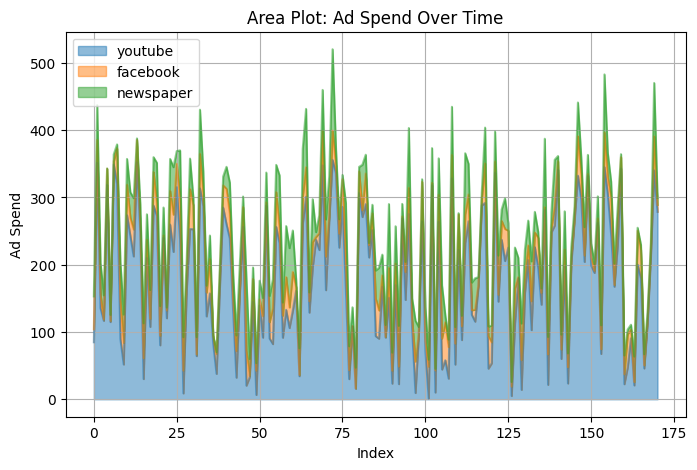

In [11]:
df[['youtube', 'facebook', 'newspaper']].plot(kind='area', figsize=(8, 5), alpha=0.5)
plt.title('Area Plot: Ad Spend Over Time')
plt.xlabel('Index')
plt.ylabel('Ad Spend')
plt.grid(True)
plt.show()


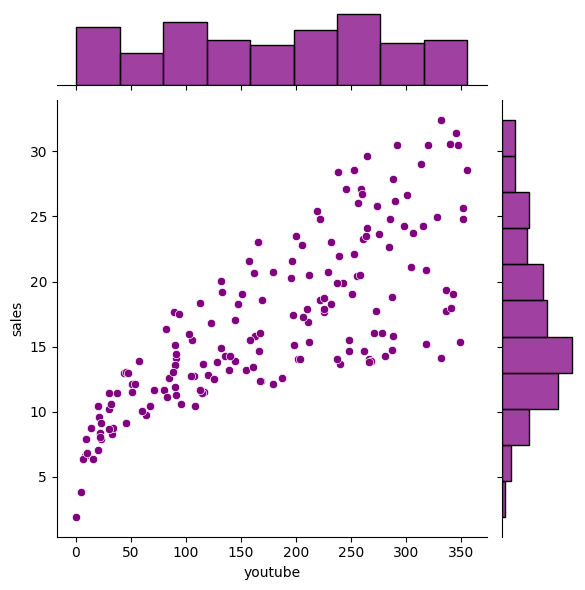

In [12]:
sns.jointplot(data=df, x='youtube', y='sales', kind='scatter', color='purple', height=6)


In [19]:
# Define features and target
X = df[['youtube', 'facebook', 'newspaper']]
y = df['sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
# Coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", list(zip(X.columns, model.coef_)))

Intercept: 3.7472402693155367
Coefficients: [('youtube', np.float64(0.044273791238038554)), ('facebook', np.float64(0.1904859499089808)), ('newspaper', np.float64(0.0007459679947040578))]


Mean Squared Error: 3.0307626680496744
R² Score: 0.929510400593731


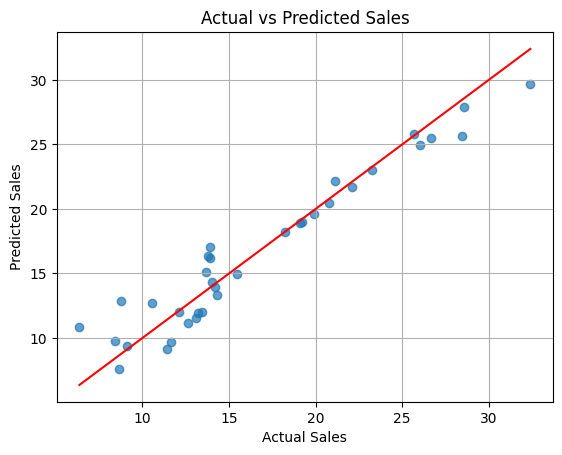

In [21]:

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

# Plot1 actual vs predicted
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # perfect prediction line
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.grid(True)
plt.show()


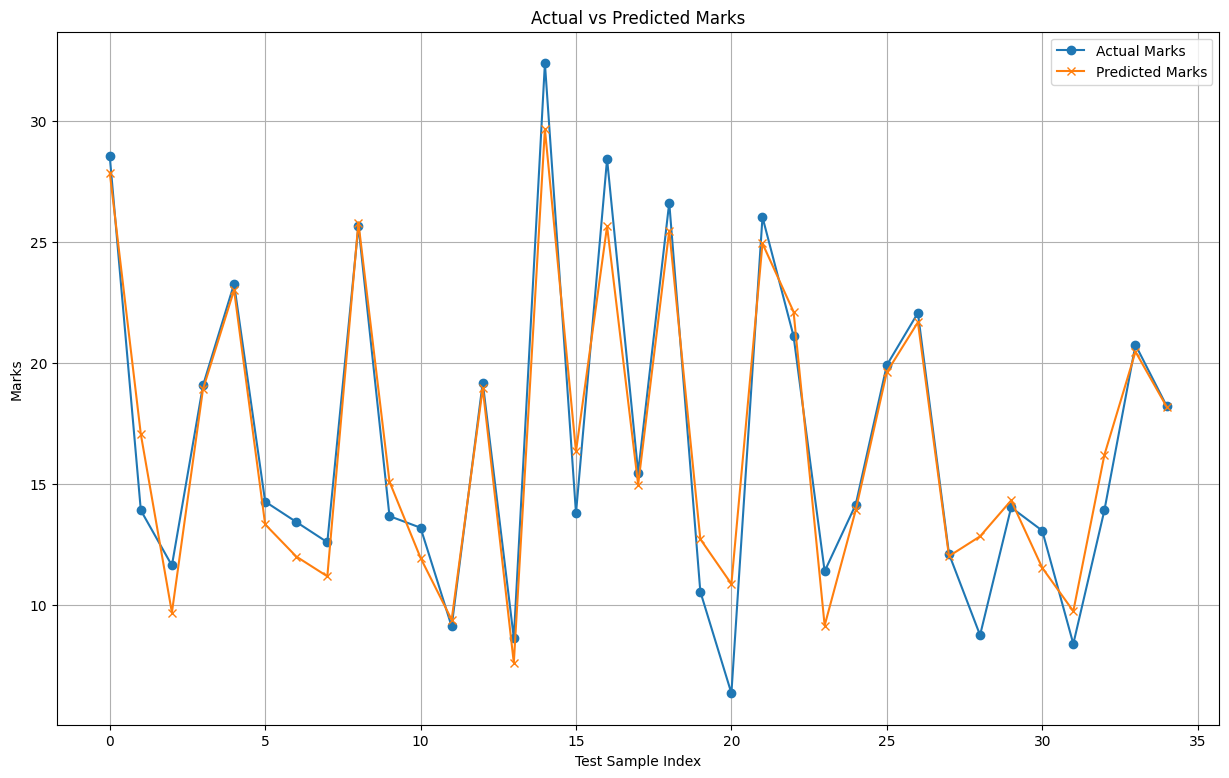

In [22]:
# Plot2 actual vs predicted
plt.figure(figsize=(15,9))
plt.plot(y_test.values, label='Actual Marks', marker='o')
plt.plot(y_pred, label='Predicted Marks', marker='x')
plt.legend()
plt.title('Actual vs Predicted Marks')
plt.xlabel('Test Sample Index')
plt.ylabel('Marks')
plt.grid(True)
plt.show()

In [23]:
# Example: input values
youtube = 675.90
facebook = 89.76
newspaper = 75.09

# Create a 2D array for prediction (since model expects that shape)
input = [[youtube, facebook, newspaper]]

# Predict
predicted_sales = model.predict(input)

print(f"Predicted Sales: {predicted_sales[0]:.2f}")

Predicted Sales: 50.83


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
